In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# Parameters
T = 1e-9  # Symbol time
N = 1000  # Number of symbols
tb = T / 10  # Bit time
V0 = 0  # Lowest voltage level
V1 = 1  # Highest voltage level

In [3]:
# Generate random data
data = np.random.randint(2, size=N)

In [4]:
# Convert binary data to PAM4 signal
pam4 = np.zeros(N)
for i in range(N):
    if data[i] == 0:
        pam4[i] = V0
    elif data[i] == 1:
        pam4[i] = V1
    elif data[i] == 2:
        pam4[i] = -V1
    elif data[i] == 3:
        pam4[i] = -V0

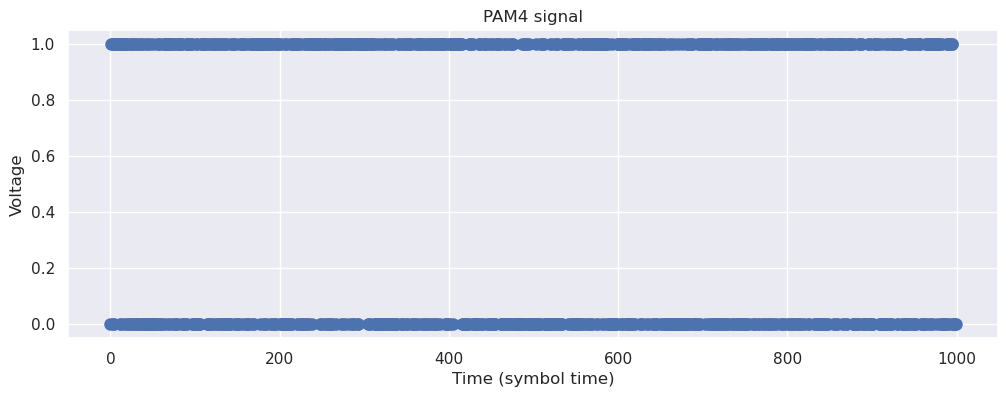

In [5]:
# Normal visualization
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(pam4, 'o', markersize=8)
ax.set_xlabel('Time (symbol time)')
ax.set_ylabel('Voltage')
ax.set_title('PAM4 signal')
plt.show()


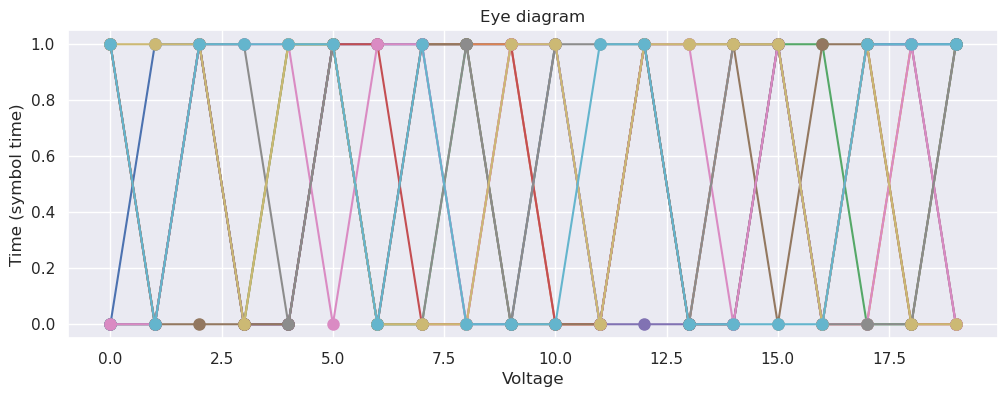

In [6]:
# Eye diagram visualization
fig, ax = plt.subplots(figsize=(12, 4))
for i in range(10):
    start = i * int(T / tb)
    end = start + int(2 * T / tb)
    ax.plot(pam4[start:end], 'o-', markersize=8)
ax.set_xlabel('Voltage')
ax.set_ylabel('Time (symbol time)')
ax.set_title('Eye diagram')
plt.show()